<a href="https://colab.research.google.com/github/EG-L/kaggle/blob/main/pima1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip /content/drive/MyDrive/PimaIndiansDiabetes/pima.zip

Archive:  /content/drive/MyDrive/PimaIndiansDiabetes/pima.zip
  inflating: diabetes.csv            


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df
# 결측치 처리를 안 해줬기에 다시 풀었음

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
np.unique(df['Glucose'],return_counts=True)

(array([  0,  44,  56,  57,  61,  62,  65,  67,  68,  71,  72,  73,  74,
         75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
         88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
        101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
        114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
        127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
        153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
        166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
        179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 193,
        194, 195, 196, 197, 198, 199]),
 array([ 5,  1,  1,  2,  1,  1,  1,  1,  3,  4,  1,  3,  4,  2,  2,  2,  4,
         3,  6,  6,  3,  6, 10,  7,  3,  7,  9,  6, 11,  9,  9,  7,  7, 13,
         8,  9,  3, 17, 17,  9, 13,  9,  6, 13, 14, 11, 13, 12,  6, 14, 13,
  

In [8]:
np.unique(df['BloodPressure'],return_counts=True)

(array([  0,  24,  30,  38,  40,  44,  46,  48,  50,  52,  54,  55,  56,
         58,  60,  61,  62,  64,  65,  66,  68,  70,  72,  74,  75,  76,
         78,  80,  82,  84,  85,  86,  88,  90,  92,  94,  95,  96,  98,
        100, 102, 104, 106, 108, 110, 114, 122]),
 array([35,  1,  2,  1,  1,  4,  2,  5, 13, 11, 11,  2, 12, 21, 37,  1, 34,
        43,  7, 30, 45, 57, 44, 52,  8, 39, 45, 40, 30, 23,  6, 21, 25, 22,
         8,  6,  1,  4,  3,  3,  1,  2,  3,  2,  3,  1,  1]))

In [9]:
np.mean(df['BloodPressure'])

69.10546875

In [10]:
np.unique(df['DiabetesPedigreeFunction'],return_counts=True)

(array([0.078, 0.084, 0.085, 0.088, 0.089, 0.092, 0.096, 0.1  , 0.101,
        0.102, 0.107, 0.108, 0.115, 0.118, 0.121, 0.122, 0.123, 0.126,
        0.127, 0.128, 0.129, 0.13 , 0.133, 0.134, 0.135, 0.136, 0.137,
        0.138, 0.14 , 0.141, 0.142, 0.143, 0.144, 0.145, 0.147, 0.148,
        0.149, 0.15 , 0.151, 0.153, 0.154, 0.155, 0.156, 0.157, 0.158,
        0.159, 0.16 , 0.161, 0.162, 0.163, 0.164, 0.165, 0.166, 0.167,
        0.17 , 0.171, 0.173, 0.174, 0.175, 0.176, 0.177, 0.178, 0.179,
        0.18 , 0.181, 0.182, 0.183, 0.186, 0.187, 0.188, 0.189, 0.19 ,
        0.191, 0.192, 0.194, 0.196, 0.197, 0.198, 0.199, 0.2  , 0.201,
        0.203, 0.204, 0.205, 0.206, 0.207, 0.209, 0.21 , 0.212, 0.215,
        0.217, 0.218, 0.219, 0.22 , 0.221, 0.222, 0.223, 0.225, 0.226,
        0.227, 0.229, 0.23 , 0.231, 0.232, 0.233, 0.234, 0.235, 0.236,
        0.237, 0.238, 0.239, 0.24 , 0.241, 0.243, 0.244, 0.245, 0.246,
        0.247, 0.248, 0.249, 0.251, 0.252, 0.253, 0.254, 0.255, 0.256,
      

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for i in cols:
  df[i] = df[i].replace(0,np.nan)

In [13]:
df.dropna(inplace=True)

In [14]:
X = df.drop(['Outcome'],axis=1)
y = df['Outcome']

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [16]:
print(X_train.shape,y_train.shape)

(294, 8) (294,)


In [17]:
print(X_test.shape,y_test.shape)

(98, 8) (98,)


In [18]:
np.unique(y_train,return_counts=True)
# 이진분류 마지막 계층 활성화 함수 sigmoid
from tensorflow.keras.layers import Dropout

In [19]:
model = keras.Sequential()
model.add(Dense(8, input_shape=(8,),activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(4,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 3

In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test))

Epoch 1/300
10/10 [==============================] - 1s 24ms/step - loss: 2.7541 - accuracy: 0.6667 - val_loss: 1.3268 - val_accuracy: 0.6735
Epoch 2/300
10/10 [==============================] - 0s 4ms/step - loss: 1.7136 - accuracy: 0.6361 - val_loss: 0.9382 - val_accuracy: 0.6735
Epoch 3/300
10/10 [==============================] - 0s 4ms/step - loss: 1.3070 - accuracy: 0.6565 - val_loss: 0.8437 - val_accuracy: 0.6735
Epoch 4/300
10/10 [==============================] - 0s 4ms/step - loss: 1.0884 - accuracy: 0.5952 - val_loss: 0.8058 - val_accuracy: 0.5204
Epoch 5/300
10/10 [==============================] - 0s 4ms/step - loss: 1.0095 - accuracy: 0.5374 - val_loss: 0.7592 - val_accuracy: 0.5816
Epoch 6/300
10/10 [==============================] - 0s 7ms/step - loss: 0.9776 - accuracy: 0.6190 - val_loss: 0.7147 - val_accuracy: 0.6735
Epoch 7/300
10/10 [==============================] - 0s 5ms/step - loss: 0.8574 - accuracy: 0.6599 - val_loss: 0.6907 - val_accuracy: 0.6735
Epoch 8/300


In [22]:
import matplotlib.pyplot as plt

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

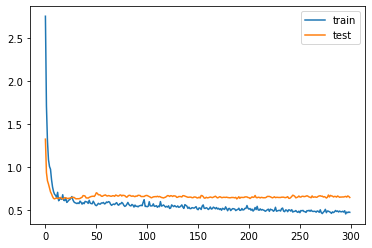

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','test'])
plt.show()

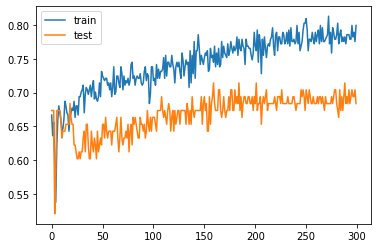

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','test'])
plt.show()

In [26]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.6497 - accuracy: 0.6837


[0.6496735215187073, 0.6836734414100647]

In [28]:
from keras import regularizers
model = keras.Sequential()
model.add(Dense(8, input_shape=(8,),activation='relu',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.01))
model.add(Dense(16,activation='relu',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.01))
model.add(Dense(8,activation='relu',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.01))
model.add(Dense(4,activation='relu',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.01))
model.add(Dense(1,activation='sigmoid'))

In [29]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test))

Epoch 1/300
10/10 [==============================] - 1s 28ms/step - loss: 17.5889 - accuracy: 0.3469 - val_loss: 12.1545 - val_accuracy: 0.3265
Epoch 2/300
10/10 [==============================] - 0s 4ms/step - loss: 10.0641 - accuracy: 0.4184 - val_loss: 7.5293 - val_accuracy: 0.6837
Epoch 3/300
10/10 [==============================] - 0s 6ms/step - loss: 8.2568 - accuracy: 0.6463 - val_loss: 7.2510 - val_accuracy: 0.6735
Epoch 4/300
10/10 [==============================] - 0s 7ms/step - loss: 7.7195 - accuracy: 0.6429 - val_loss: 6.9758 - val_accuracy: 0.6735
Epoch 5/300
10/10 [==============================] - 0s 4ms/step - loss: 7.3550 - accuracy: 0.6939 - val_loss: 6.7003 - val_accuracy: 0.6735
Epoch 6/300
10/10 [==============================] - 0s 4ms/step - loss: 7.0628 - accuracy: 0.6735 - val_loss: 6.4292 - val_accuracy: 0.6735
Epoch 7/300
10/10 [==============================] - 0s 6ms/step - loss: 6.8655 - accuracy: 0.6667 - val_loss: 6.1699 - val_accuracy: 0.6735
Epoch 8/3

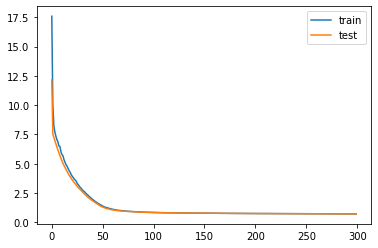

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','test'])
plt.show()

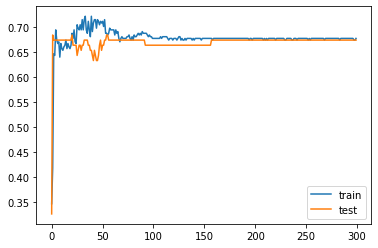

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','test'])
plt.show()